# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

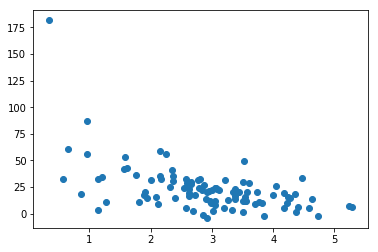

In [10]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [11]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

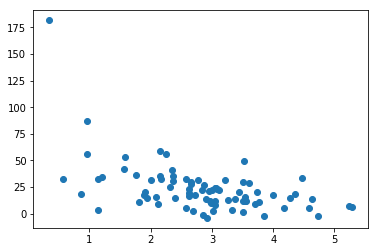

In [12]:
scatter(trainX, trainY)

And our test dataset:

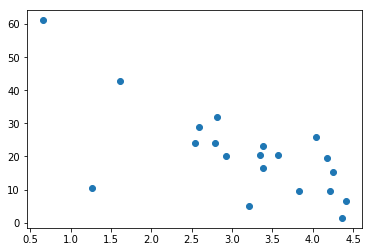

In [13]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [14]:
x = np.array(trainX)
y = np.array(trainY)

p8 = np.poly1d(np.polyfit(x, y, 8))

Let's plot our polynomial against the training data:

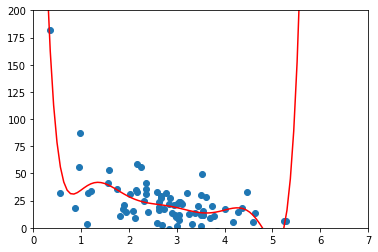

In [15]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p8(xp), c='r')
plt.show()


And against our test data:

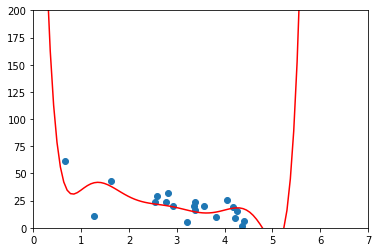

In [16]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p8(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p8(testx))

print(r2)


0.30018168611266705


...even though it fits the training data better:

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p8(np.array(trainX)))

print(r2)

0.6427069514690176


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

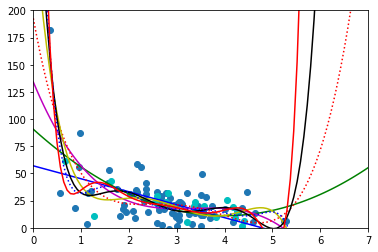

Train:  0.2646676132565092  Test:  0.4225414067989236
Train:  0.36158094628302195  Test:  0.29350317937846837
Train:  0.4295783201206691  Test:  0.27274311475200474
Train:  0.48312216559720367  Test:  0.39362692609902783
Train:  0.5544872536567732  Test:  0.5040723897194399
Train:  0.6025441707110515  Test:  0.6050119470361516
Train:  0.6170116571731913  Test:  0.5461451452852304
Train:  0.6427069514690176  Test:  0.30018168611266705


In [25]:
p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
p4 = np.poly1d(np.polyfit(x, y, 4))
p4 = np.poly1d(np.polyfit(x, y, 4))
p5 = np.poly1d(np.polyfit(x, y, 5))
p6 = np.poly1d(np.polyfit(x, y, 6))
p7 = np.poly1d(np.polyfit(x, y, 7))

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.scatter(testx,testy,c='c')
plt.plot(xp, p1(xp), c='b')
plt.plot(xp, p2(xp), c='g')
plt.plot(xp, p3(xp), c='m')
plt.plot(xp, p4(xp), 'r:')
plt.plot(xp, p5(xp), c='y')
plt.plot(xp, p6(xp), c='k')
plt.plot(xp, p7(xp), 'b:')
plt.plot(xp, p8(xp), c='r')
plt.show()

for p in [p1,p2,p3,p4,p5,p6,p7,p8]:
    r2_train = r2_score(y, p(x))
    r2_test = r2_score(testy, p(testx))
    print("Train: ",r2_train," Test: ",r2_test)

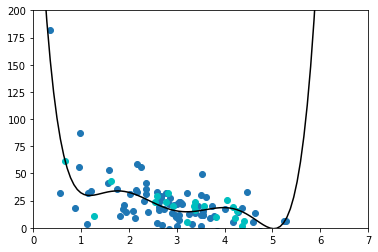

Train:  0.6025441707110515  Test:  0.6050119470361516


In [26]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.scatter(testx,testy,c='c')
plt.plot(xp, p6(xp), c='k')
plt.show()

r2_train = r2_score(y, p6(x))
r2_test = r2_score(testy, p6(testx))
print("Train: ",r2_train," Test: ",r2_test)